# Stage 2 \- Johannes Kaendler



First, we define some constants. We want to look at July\-December, but beacuse we wnat to look at the difference, we start at the last Sunday in June 2020. The Array of states are my choice for the comparisson. The Factor will be used for the normalisation.


In [1]:
FIRST_DATE = '2020-06-28'
LAST_DATE = '2020-12-27'
STATES = ['NC', 'AL', 'FL', 'CA', 'TX', 'SC']
FACTOR = 10000 # for normalisation
PICTURE_HEIGHT = 400
PICTURE_WIDTH = 1000

Next, we import the data and normalize it.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image
import os

if not os.path.exists("images"):
    os.mkdir("images")

raw_cases = pd.read_csv("../Team/covid_confirmed_usafacts.csv")
raw_deaths = pd.read_csv("../Team/covid_deaths_usafacts.csv")
county_population = pd.read_csv("../Team/covid_county_population_usafacts.csv")

In [3]:
raw_cases = raw_cases.merge(county_population[['countyFIPS','population']], on='countyFIPS')
cases = raw_cases.drop(raw_cases[raw_cases.population == 0].index)
for col in cases.columns:
    if FIRST_DATE <= col <= LAST_DATE:
        cases[col] = cases[col] / cases['population'] * FACTOR

raw_deaths = raw_deaths.merge(county_population[['countyFIPS','population']], on='countyFIPS')
deaths = raw_deaths.drop(raw_cases[raw_deaths.population == 0].index)
for col in deaths.columns:
    if FIRST_DATE <= col <= LAST_DATE:
        deaths[col] = deaths[col] / deaths['population'] * FACTOR

Now we select only the Sundays in our desired range


In [4]:
selected_date_columns = [col for col in cases.columns if FIRST_DATE <= col <= LAST_DATE]
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]
selected_columns = additional_columns + selected_date_columns[0::7]
selected_cases = cases[selected_columns]
selected_deaths = deaths[selected_columns]

selected_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-06-28,2020-07-05,2020-07-12,2020-07-19,2020-07-26,2020-08-02,...,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27
2601,1001,Autauga County,AL,1,90.032039,110.078935,126.367037,150.709696,168.608710,188.297625,...,368.540693,388.945569,408.634484,439.599778,468.417190,492.401869,537.865364,578.675115,669.602105,721.151265
2602,1003,Baldwin County,AL,1,25.757725,39.465314,57.966080,86.769936,121.307686,144.377649,...,298.252058,312.049240,323.696211,342.510549,367.282762,395.101105,435.775912,469.865701,529.802808,574.509259
2603,1005,Barbour County,AL,1,128.412866,142.590942,163.250425,200.518513,227.659402,247.103621,...,418.455805,429.798266,443.571255,456.939156,469.901969,475.978287,495.422507,512.031111,541.197440,569.553593
2604,1007,Bibb County,AL,1,72.340806,86.183799,101.812986,120.121461,144.681611,166.115924,...,375.100473,392.069304,413.503617,440.296508,507.278735,530.499241,577.386800,624.274359,720.282218,779.673127
2605,1009,Blount County,AL,1,32.684260,41.330889,57.240688,83.353509,111.714454,140.594196,...,334.105766,362.293778,397.226161,440.805174,476.256355,509.459413,570.504617,633.452080,729.429668,772.144018


Now we focus on North Carolina. For a better analysis, we want to look at the change in the numbers, not the absolut numbers


In [5]:
nc_cases = selected_cases.loc[selected_cases['State'] == 'NC']
nc_deaths = selected_deaths.loc[selected_deaths['State'] == 'NC']

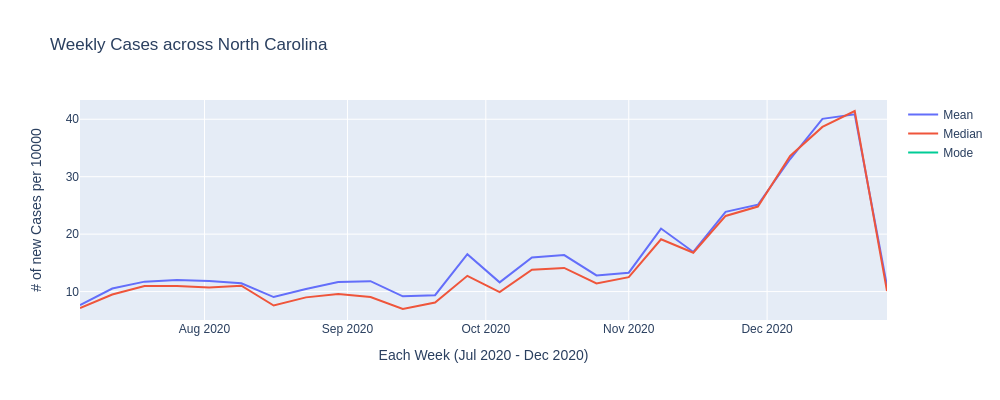

In [6]:
nc_diff_cases = nc_cases[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)
mean = nc_diff_cases.mean()
median = nc_diff_cases.median()
mode = nc_diff_cases.mode()

fig = go.Figure()

fig.add_trace(go.Scatter(x=mean.index, y=mean,
                         mode='lines', name='Mean'))

fig.add_trace(go.Scatter(x=mean.index, y=median,
                         mode='lines', name='Median'))

fig.add_trace(go.Scatter(x=mean.index, y=mode.T,
                         mode='lines', name='Mode'))

fig.update_layout(
    title='Weekly Cases across North Carolina',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Cases per {FACTOR}'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)

fig.write_image("images/weekly_case_nc.png")
Image(filename="images/weekly_case_nc.png")

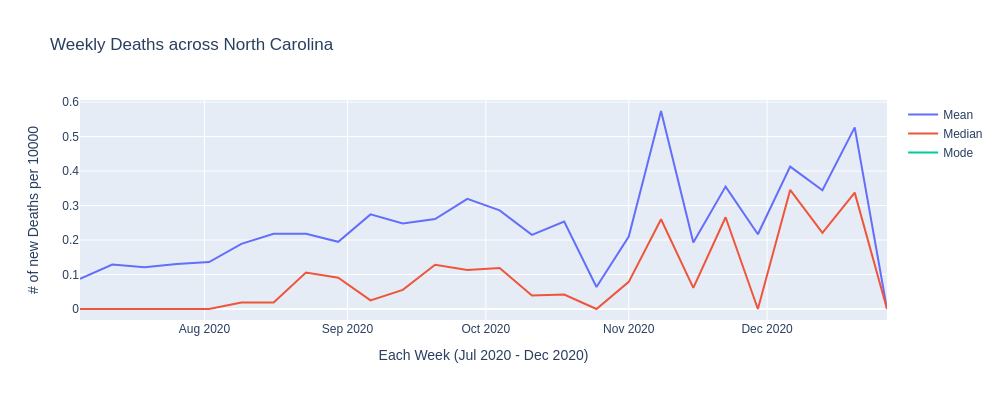

In [7]:
nc_diff_deaths = nc_deaths[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)
mean = nc_diff_deaths.mean()
median = nc_diff_deaths.median()
mode = nc_diff_deaths.mode()

fig = go.Figure()

fig.add_trace(go.Scatter(x=mean.index, y=mean,
                         mode='lines', name='Mean'))

fig.add_trace(go.Scatter(x=mean.index, y=median,
                         mode='lines', name='Median'))

fig.add_trace(go.Scatter(x=mean.index, y=mode.T,
                         mode='lines', name='Mode'))

fig.update_layout(
    title='Weekly Deaths across North Carolina',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Deaths per {FACTOR}'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)

fig.write_image("images/weekly_death_nc.png")

Image(filename="images/weekly_death_nc.png")

We can see, that the mode statistic is not very useful in this case, so we will be ignoring it from now. Next, we define functions that give us the mean of cases and deaths for a given state and use it, to compare the states.


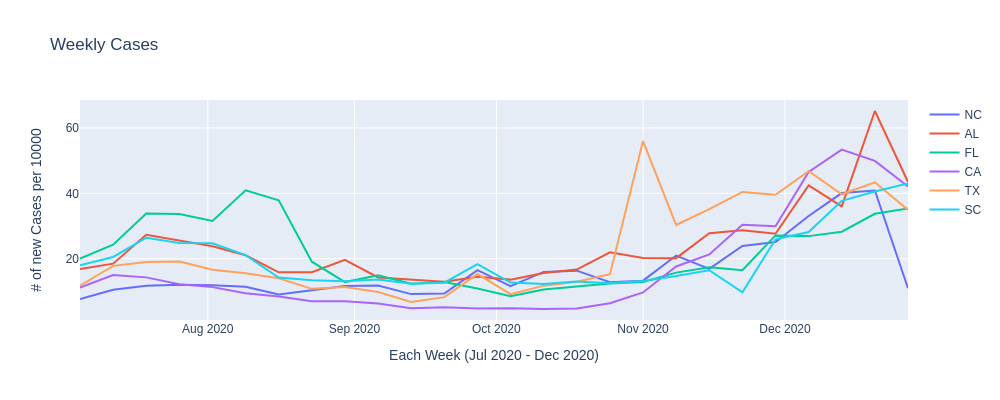

In [8]:
def analyzeStateCases(state):
    state_cases = selected_cases.loc[selected_cases['State'] == state]
    diff_cases = state_cases[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)
    return diff_cases.mean()

def analyzeStateDeaths(state):
    state_deaths = selected_deaths.loc[selected_deaths['State'] == state]
    diff_cases = state_cases[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)
    return diff_cases.mean()


fig = go.Figure()

for state in STATES:
    temp = analyzeStateCases(state)
    fig.add_trace(go.Scatter(x=temp.index, y=temp,
                         mode='lines', name=state))



fig.update_layout(
    title='Weekly Cases',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Cases per {FACTOR}'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)
fig.write_image("images/weekly_case_states.png")

Image(filename="images/weekly_case_states.png")

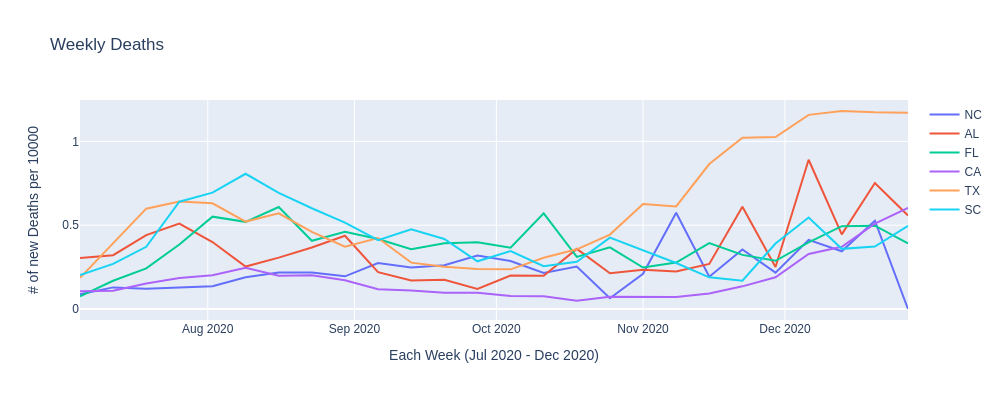

In [9]:
def analyzeStateDeaths(state):
    state_deaths = selected_deaths.loc[selected_deaths['State'] == state]
    diff_cases = state_deaths[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)
    return diff_cases.mean()


fig = go.Figure()

for state in STATES:
    temp = analyzeStateDeaths(state)
    fig.add_trace(go.Scatter(x=temp.index, y=temp,
                         mode='lines', name=state))



fig.update_layout(
    title='Weekly Deaths',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Deaths per {FACTOR}'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)

fig.write_image("images/weekly_death_state.png")

Image(filename="images/weekly_death_state.png")

The rates differ, since even though the pandemic was a global event, the actual spread is a local event. So certain states were introduced to the virus later than others. So we would expect that lines are slightly shifted horizontally. The states have also very different demographics and infrastructure, which will lead to different rates. However, the general trend is similar to the US trend we have seen in the team report. To find out the five counties with the strongest spread, we sort them by the max of all normalized new cases.


In [10]:
nc_diff_cases['max'] = nc_diff_cases[[col for col in nc_diff_cases.columns if FIRST_DATE <= col <= LAST_DATE]].max(axis=1)
nc_diff_cases.sort_values(['max']).join(cases[additional_columns]).head()

,2020-07-05,2020-07-12,2020-07-19,2020-07-26,2020-08-02,2020-08-09,2020-08-16,2020-08-23,2020-08-30,2020-09-06,...,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,max,countyFIPS,County Name,State,StateFIPS
4509,7.251242,8.325500,7.251242,9.265476,7.922653,8.862629,7.116960,9.265476,7.788371,8.191218,...,12.353968,13.428226,16.382436,17.188129,4.028468,17.188129,37037,Chatham County,NC,37
4505,6.441520,3.680869,9.202172,6.441520,10.122389,8.281955,3.680869,8.281955,11.042606,3.680869,...,15.643692,15.643692,21.164995,19.324561,7.361737,21.164995,37029,Camden County,NC,37
4518,7.835932,10.808182,7.565727,9.457159,6.484909,2.702045,0.810614,4.863682,3.242455,1.891432,...,15.942068,19.995136,20.535545,17.022886,8.106136,22.156773,37055,Dare County,NC,37
4500,11.693040,9.452458,11.132895,7.842039,9.522476,4.271110,4.271110,3.010783,2.240583,3.360874,...,17.154460,22.755917,20.935443,20.865425,6.231620,22.755917,37019,Brunswick County,NC,37
4512,1.780785,1.780785,16.027068,18.698246,5.342356,6.232749,9.794319,5.342356,5.342356,7.123141,...,8.013534,16.917461,9.794319,17.807853,7.123141,24.930995,37043,Clay County,NC,37


Now that we have identified the five counties, we can plot the weekly trends.


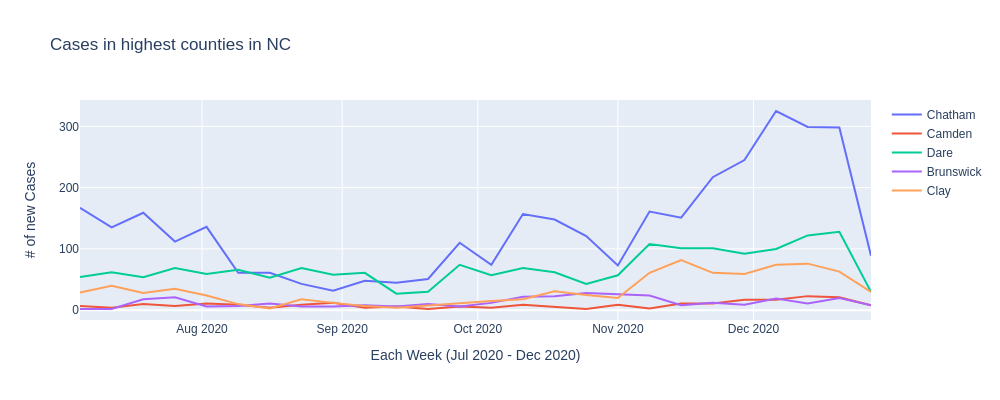

In [11]:
high_counties = [37037, 37029, 37055, 37019, 37043]

selected_county_cases = raw_cases[selected_columns].loc[raw_cases['countyFIPS'].isin(high_counties)]
selected_county_cases = selected_county_cases[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)




fig = go.Figure()


fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=selected_county_cases.iloc[0], mode='lines', name="Chatham"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=selected_county_cases.iloc[1], mode='lines', name="Camden"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=selected_county_cases.iloc[2], mode='lines', name="Dare"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=selected_county_cases.iloc[3], mode='lines', name="Brunswick"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=selected_county_cases.iloc[4], mode='lines', name="Clay"))



fig.update_layout(
    title='Cases in highest counties in NC',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Cases'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)

fig.write_image("images/weekly_case_counties.png")

Image(filename="images/weekly_case_counties.png")

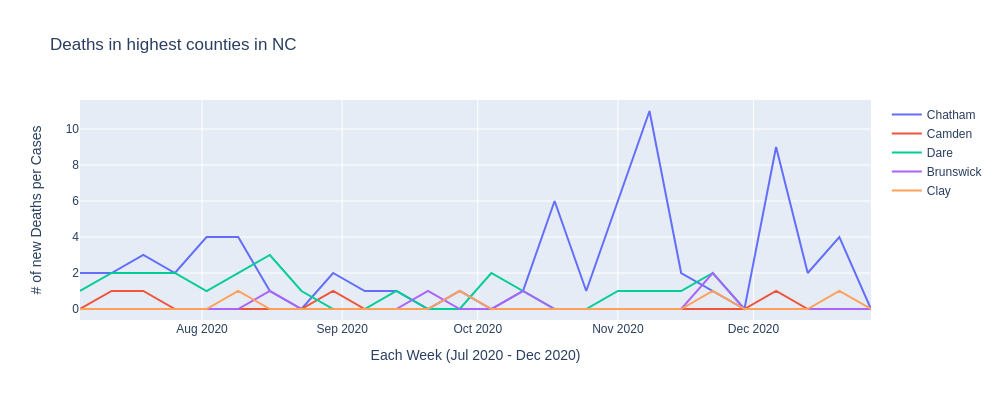

In [12]:
selected_county_deaths = raw_deaths[selected_columns].loc[raw_deaths['countyFIPS'].isin(high_counties)]
selected_county_deaths = selected_county_deaths[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)




fig = go.Figure()


fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=selected_county_deaths.iloc[0], mode='lines', name="Chatham"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=selected_county_deaths.iloc[1], mode='lines', name="Camden"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=selected_county_deaths.iloc[2], mode='lines', name="Dare"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=selected_county_deaths.iloc[3], mode='lines', name="Brunswick"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=selected_county_deaths.iloc[4], mode='lines', name="Clay"))



fig.update_layout(
    title='Deaths in highest counties in NC',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Deaths per Cases'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)

fig.write_image("images/weekly_deaths_counties.png")

Image(filename="images/weekly_deaths_counties.png")

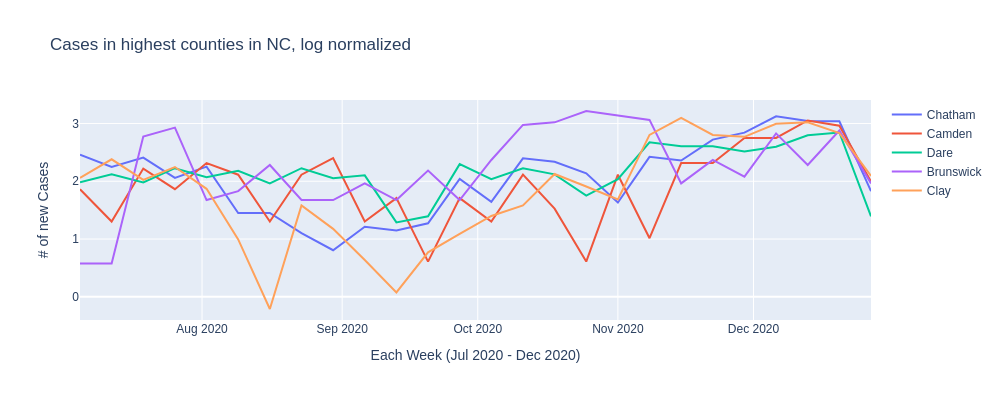

In [13]:
selected_county_cases = cases[selected_columns].loc[cases['countyFIPS'].isin(high_counties)]
selected_county_cases = selected_county_cases[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)




fig = go.Figure()


fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=np.log(selected_county_cases.iloc[0]), mode='lines', name="Chatham"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=np.log(selected_county_cases.iloc[1]), mode='lines', name="Camden"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=np.log(selected_county_cases.iloc[2]), mode='lines', name="Dare"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=np.log(selected_county_cases.iloc[3]), mode='lines', name="Brunswick"))
fig.add_trace(go.Scatter(x=selected_county_cases.columns, y=np.log(selected_county_cases.iloc[4]), mode='lines', name="Clay"))



fig.update_layout(
    title='Cases in highest counties in NC, log normalized',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Cases'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)

fig.write_image("images/weekly_cases_counties_log.png")

Image(filename="images/weekly_cases_counties_log.png")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



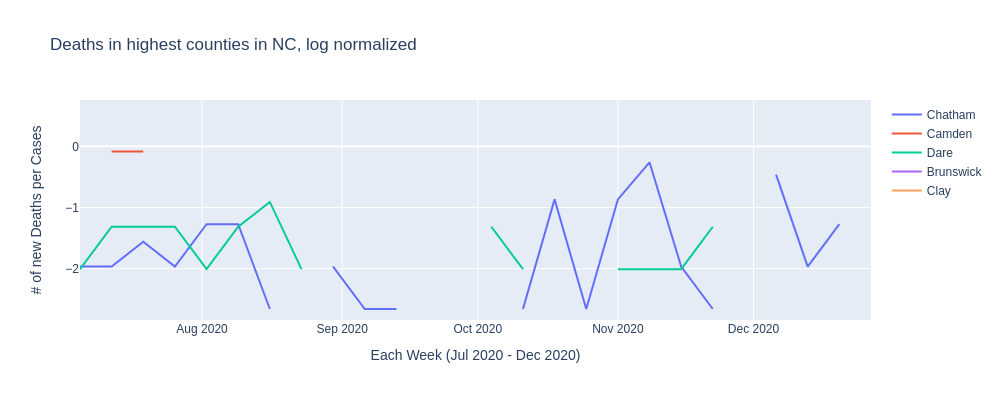

In [14]:
selected_county_deaths = deaths[selected_columns].loc[deaths['countyFIPS'].isin(high_counties)]
selected_county_deaths = selected_county_deaths[selected_date_columns[0::7]].diff(axis=1).drop(FIRST_DATE, axis=1)




fig = go.Figure()


fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=np.log(selected_county_deaths.iloc[0]), mode='lines', name="Chatham"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=np.log(selected_county_deaths.iloc[1]), mode='lines', name="Camden"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=np.log(selected_county_deaths.iloc[2]), mode='lines', name="Dare"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=np.log(selected_county_deaths.iloc[3]), mode='lines', name="Brunswick"))
fig.add_trace(go.Scatter(x=selected_county_deaths.columns, y=np.log(selected_county_deaths.iloc[4]), mode='lines', name="Clay"))



fig.update_layout(
    title='Deaths in highest counties in NC, log normalized',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title=f'# of new Deaths per Cases'),
    showlegend=True,
    width=PICTURE_WIDTH,
    height=PICTURE_HEIGHT
)

fig.write_image("images/weekly_deaths_counties_log.png")

Image(filename="images/weekly_deaths_counties_log.png")

Since we sometime have no death in a county, performing a log normalisation doesn't really work.
